In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (14, 10)


import warnings
warnings.filterwarnings("ignore")


#  Churn prediction using Bank dataset
retrived from https://github.com/PRIYANG-BHATT/Datasets-Youtube-Pandas


- 'surname',  
- 'creditscore'           score given by the bank INT
- 'geography'             country
- 'gender',               male or female
- 'age'                   age of the cusomter
- 'tenure',               Numerical, No of years that the custmer has been in the company
- 'balance',              balance in the account of the customer 
- 'number of products'    what services does the customer have
- 'hascrcard'             1 yes and 0 no
- 'isactivemember'        1 yes and 0 no  
- 'estimated salary'      estimated salary of the customer 
- 'Churn'                 1 yes and 0 no

In [2]:
df = pd.read_csv("data/Churn_Modelling.csv", index_col=[1])
df.drop(["Surname", "RowNumber"], axis=1, inplace=True)
df.columns = map(str.lower, df.columns)

In [ ]:
df.to_csv("data/churn_modeling_clean.csv")

In [3]:
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   creditscore      10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofproducts    10000 non-null  int64  
 7   hascrcard        10000 non-null  int64  
 8   isactivemember   10000 non-null  int64  
 9   estimatedsalary  10000 non-null  float64
 10  exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [5]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


---
# EDA
---

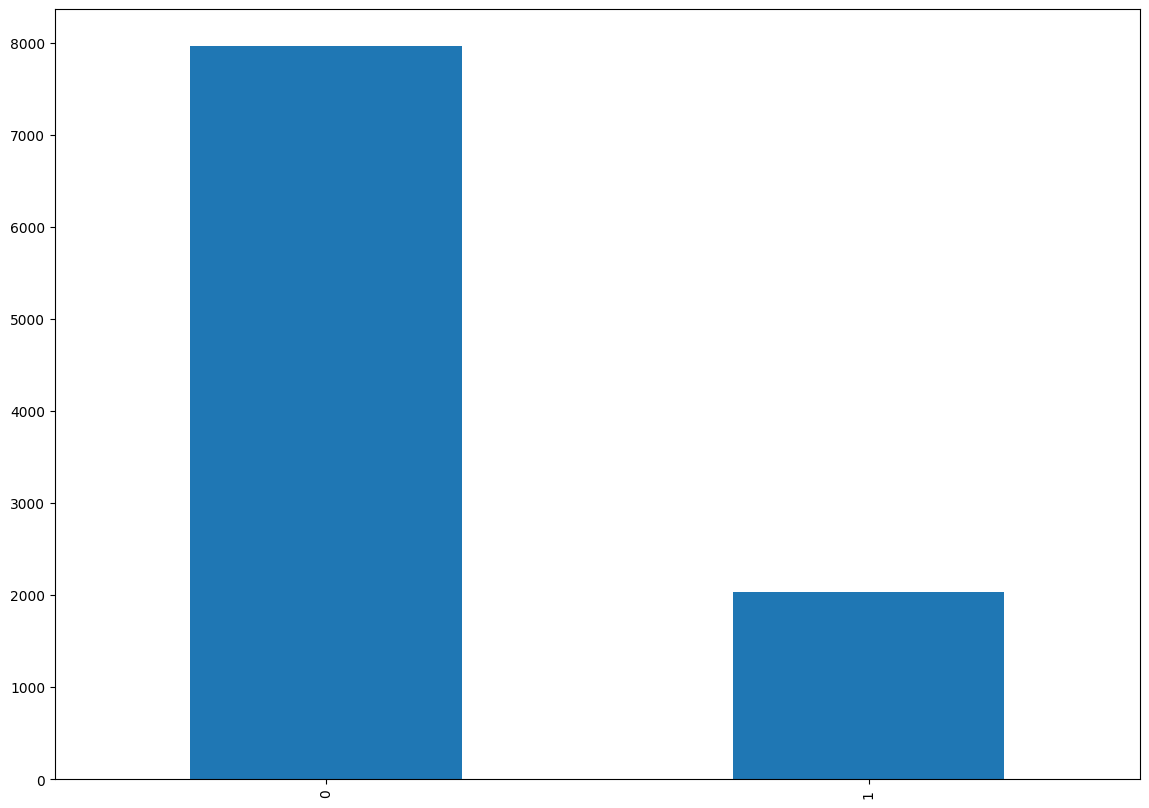

In [11]:
df.exited.value_counts().plot(kind="bar");

In [13]:
df.exited.value_counts()*100/len(df.exited)

0    79.63
1    20.37
Name: exited, dtype: float64

## the Data set is highly imbalanced
- 79.63 % of the customers stayed with the bank 
- 20.37 % of the customers left the bank

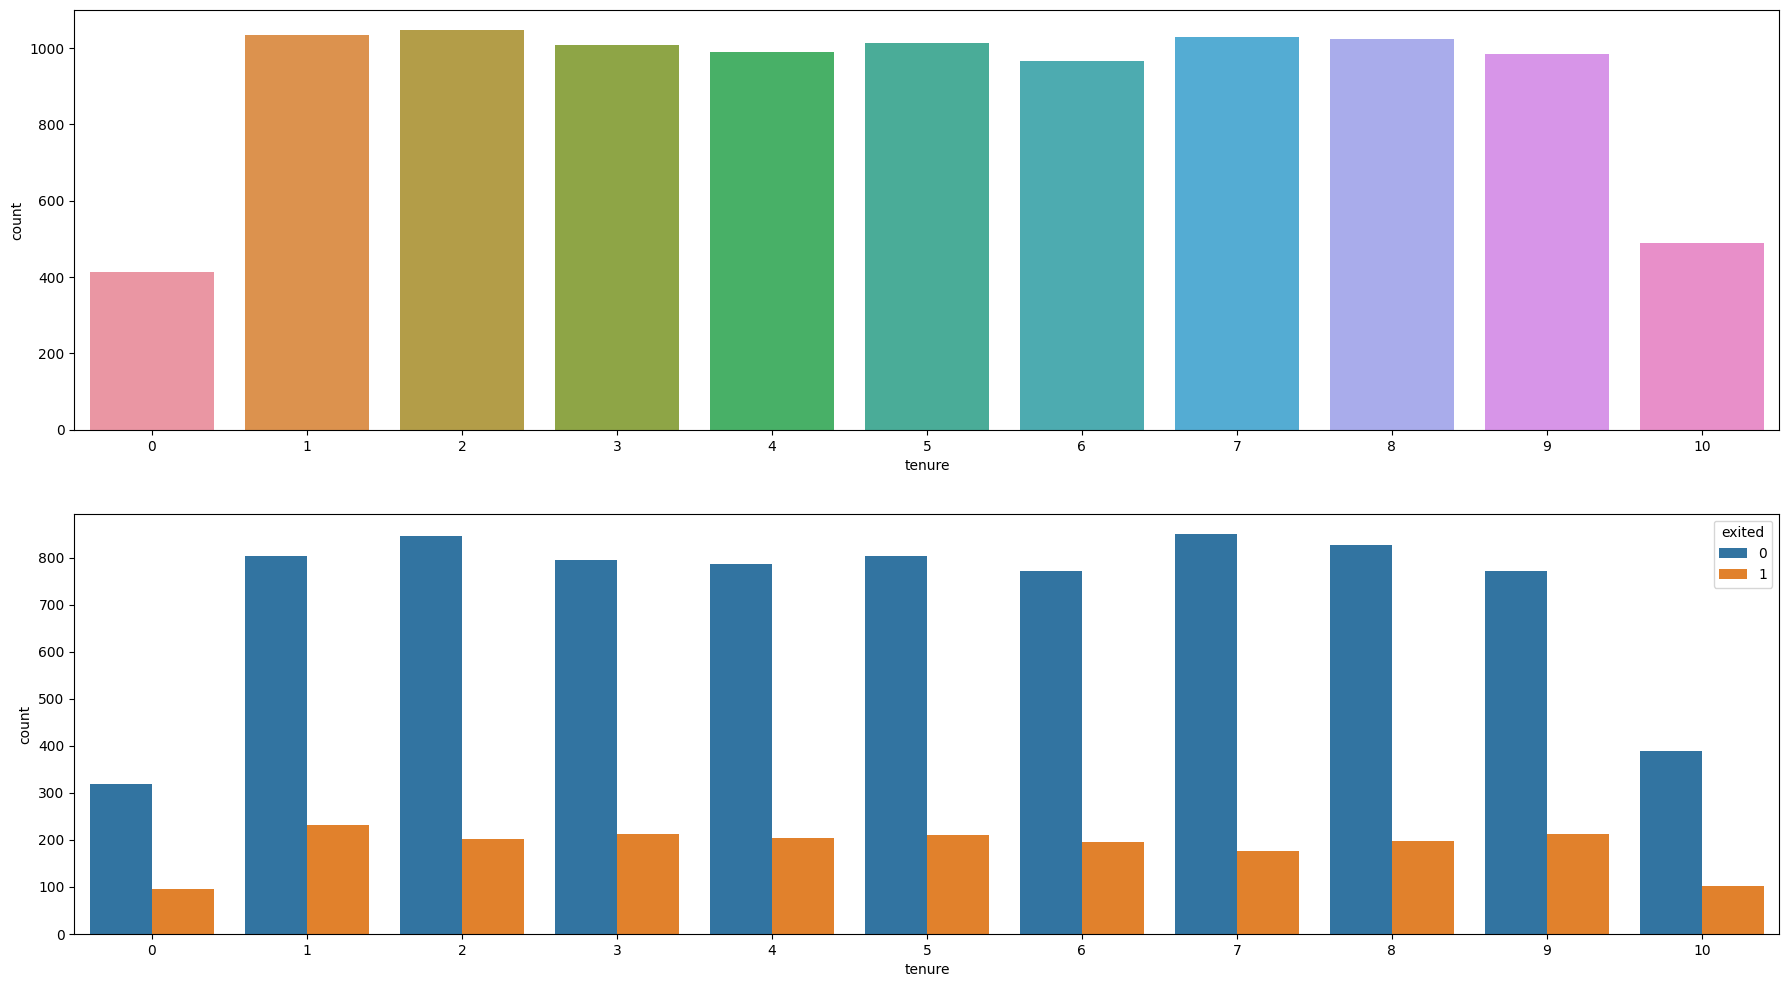

In [14]:
fig, ax = plt.subplots(2,1, figsize=(22,12))
sns.countplot(data=df, x="tenure", ax=ax[0])
sns.countplot(data=df, x="tenure", hue="exited", ax=ax[1]);

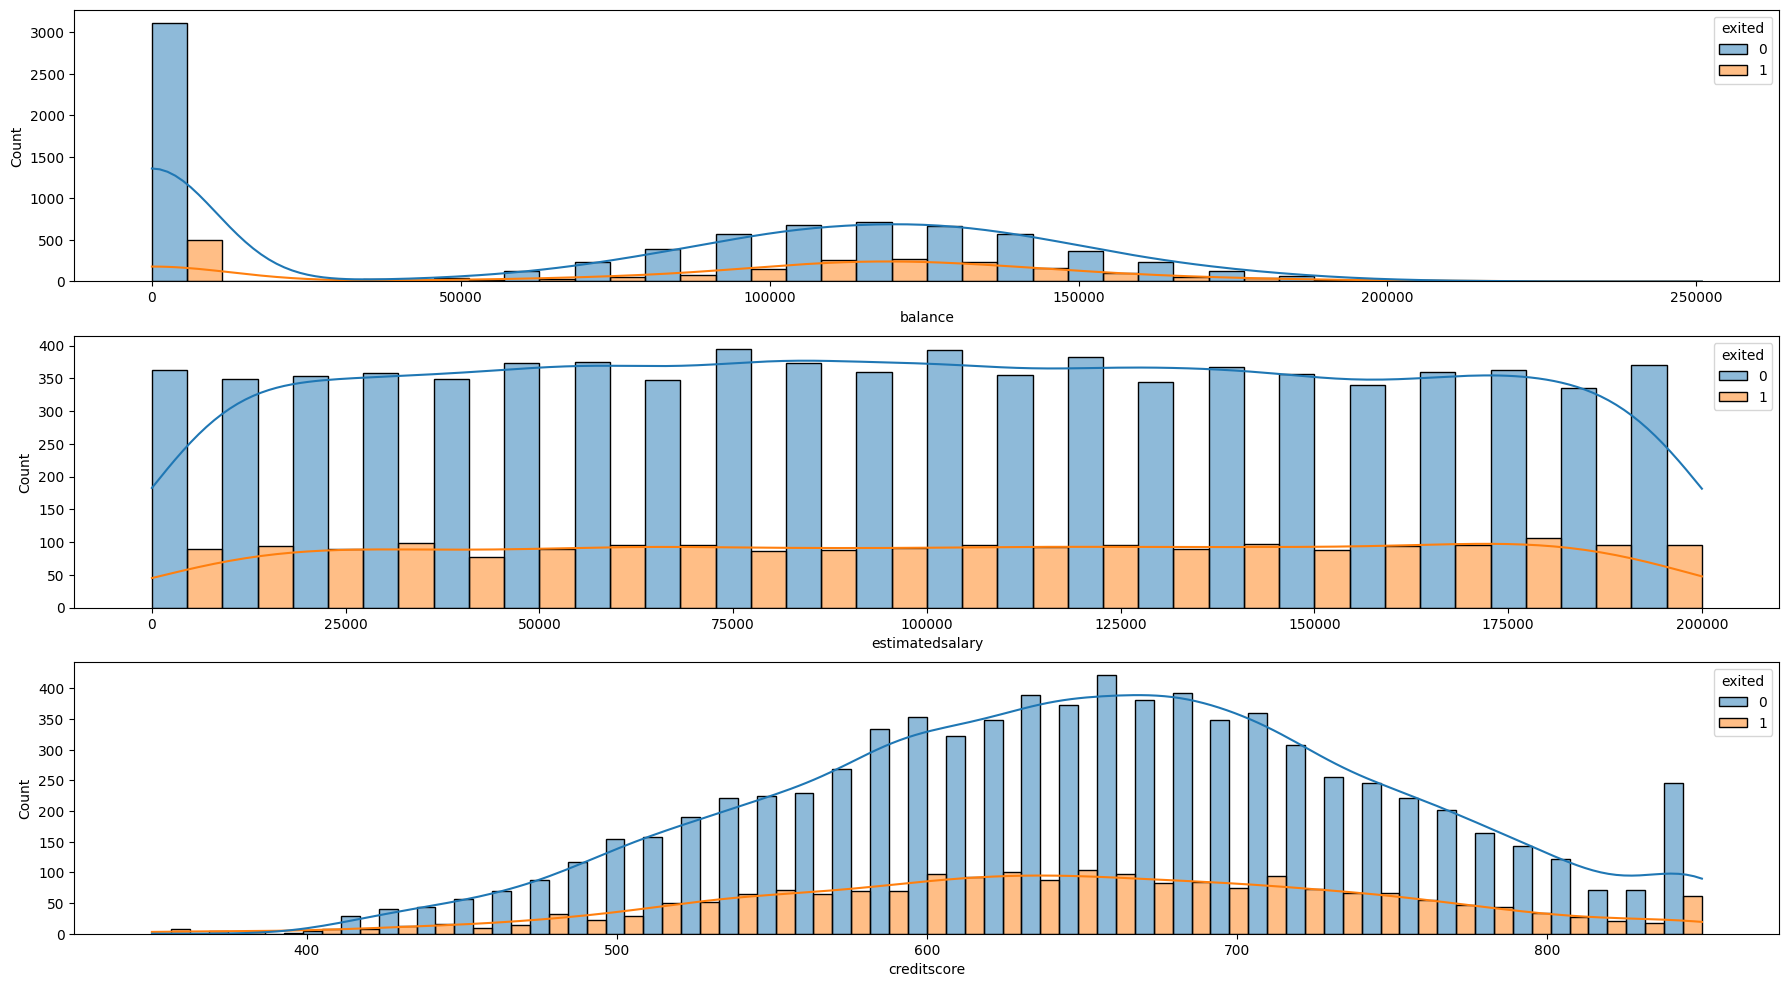

In [24]:
fig, ax = plt.subplots(3,1, figsize=(22,12))
sns.histplot(data=df, x="balance", hue="exited", multiple="dodge", kde=True, ax=ax[0])
sns.histplot(data=df, x="estimatedsalary", hue="exited", multiple="dodge", kde=True, ax=ax[1]);
sns.histplot(data=df, x="creditscore", hue="exited", multiple="dodge", kde=True, ax=ax[2]);


In [17]:
df

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1


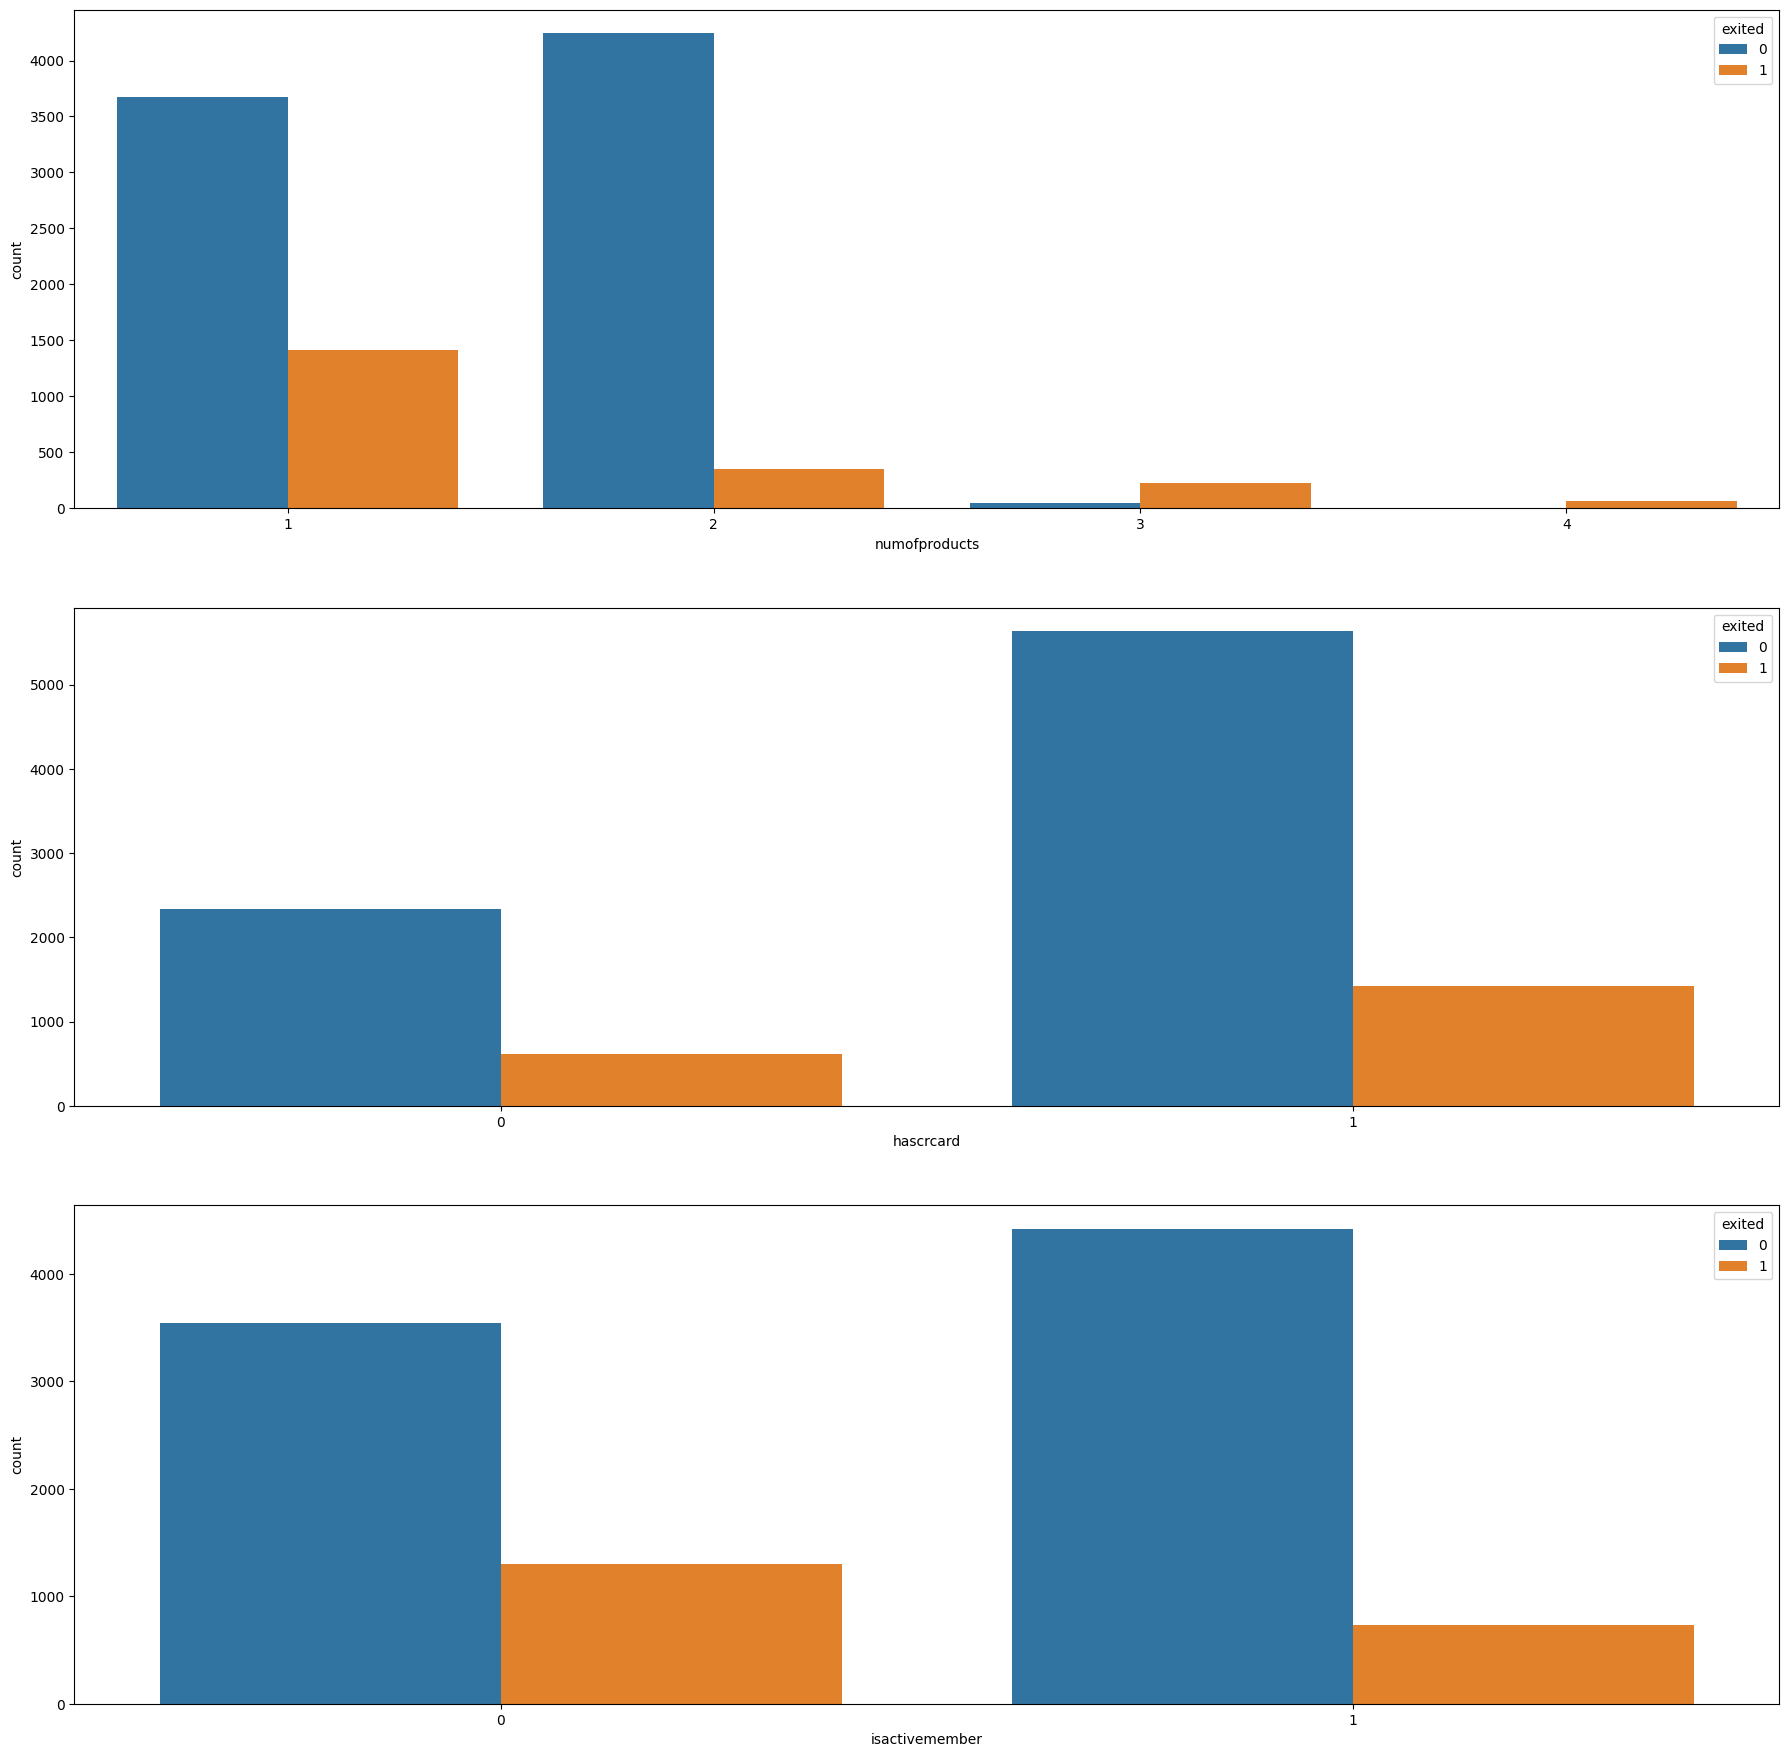

In [19]:
fig, ax = plt.subplots(3,1, figsize=(22,22))

sns.countplot(data=df, x="numofproducts", hue="exited", ax=ax[0])

sns.countplot(data=df, x="hascrcard", hue="exited", ax=ax[1])

sns.countplot(data=df, x="isactivemember", hue="exited", ax=ax[2]);


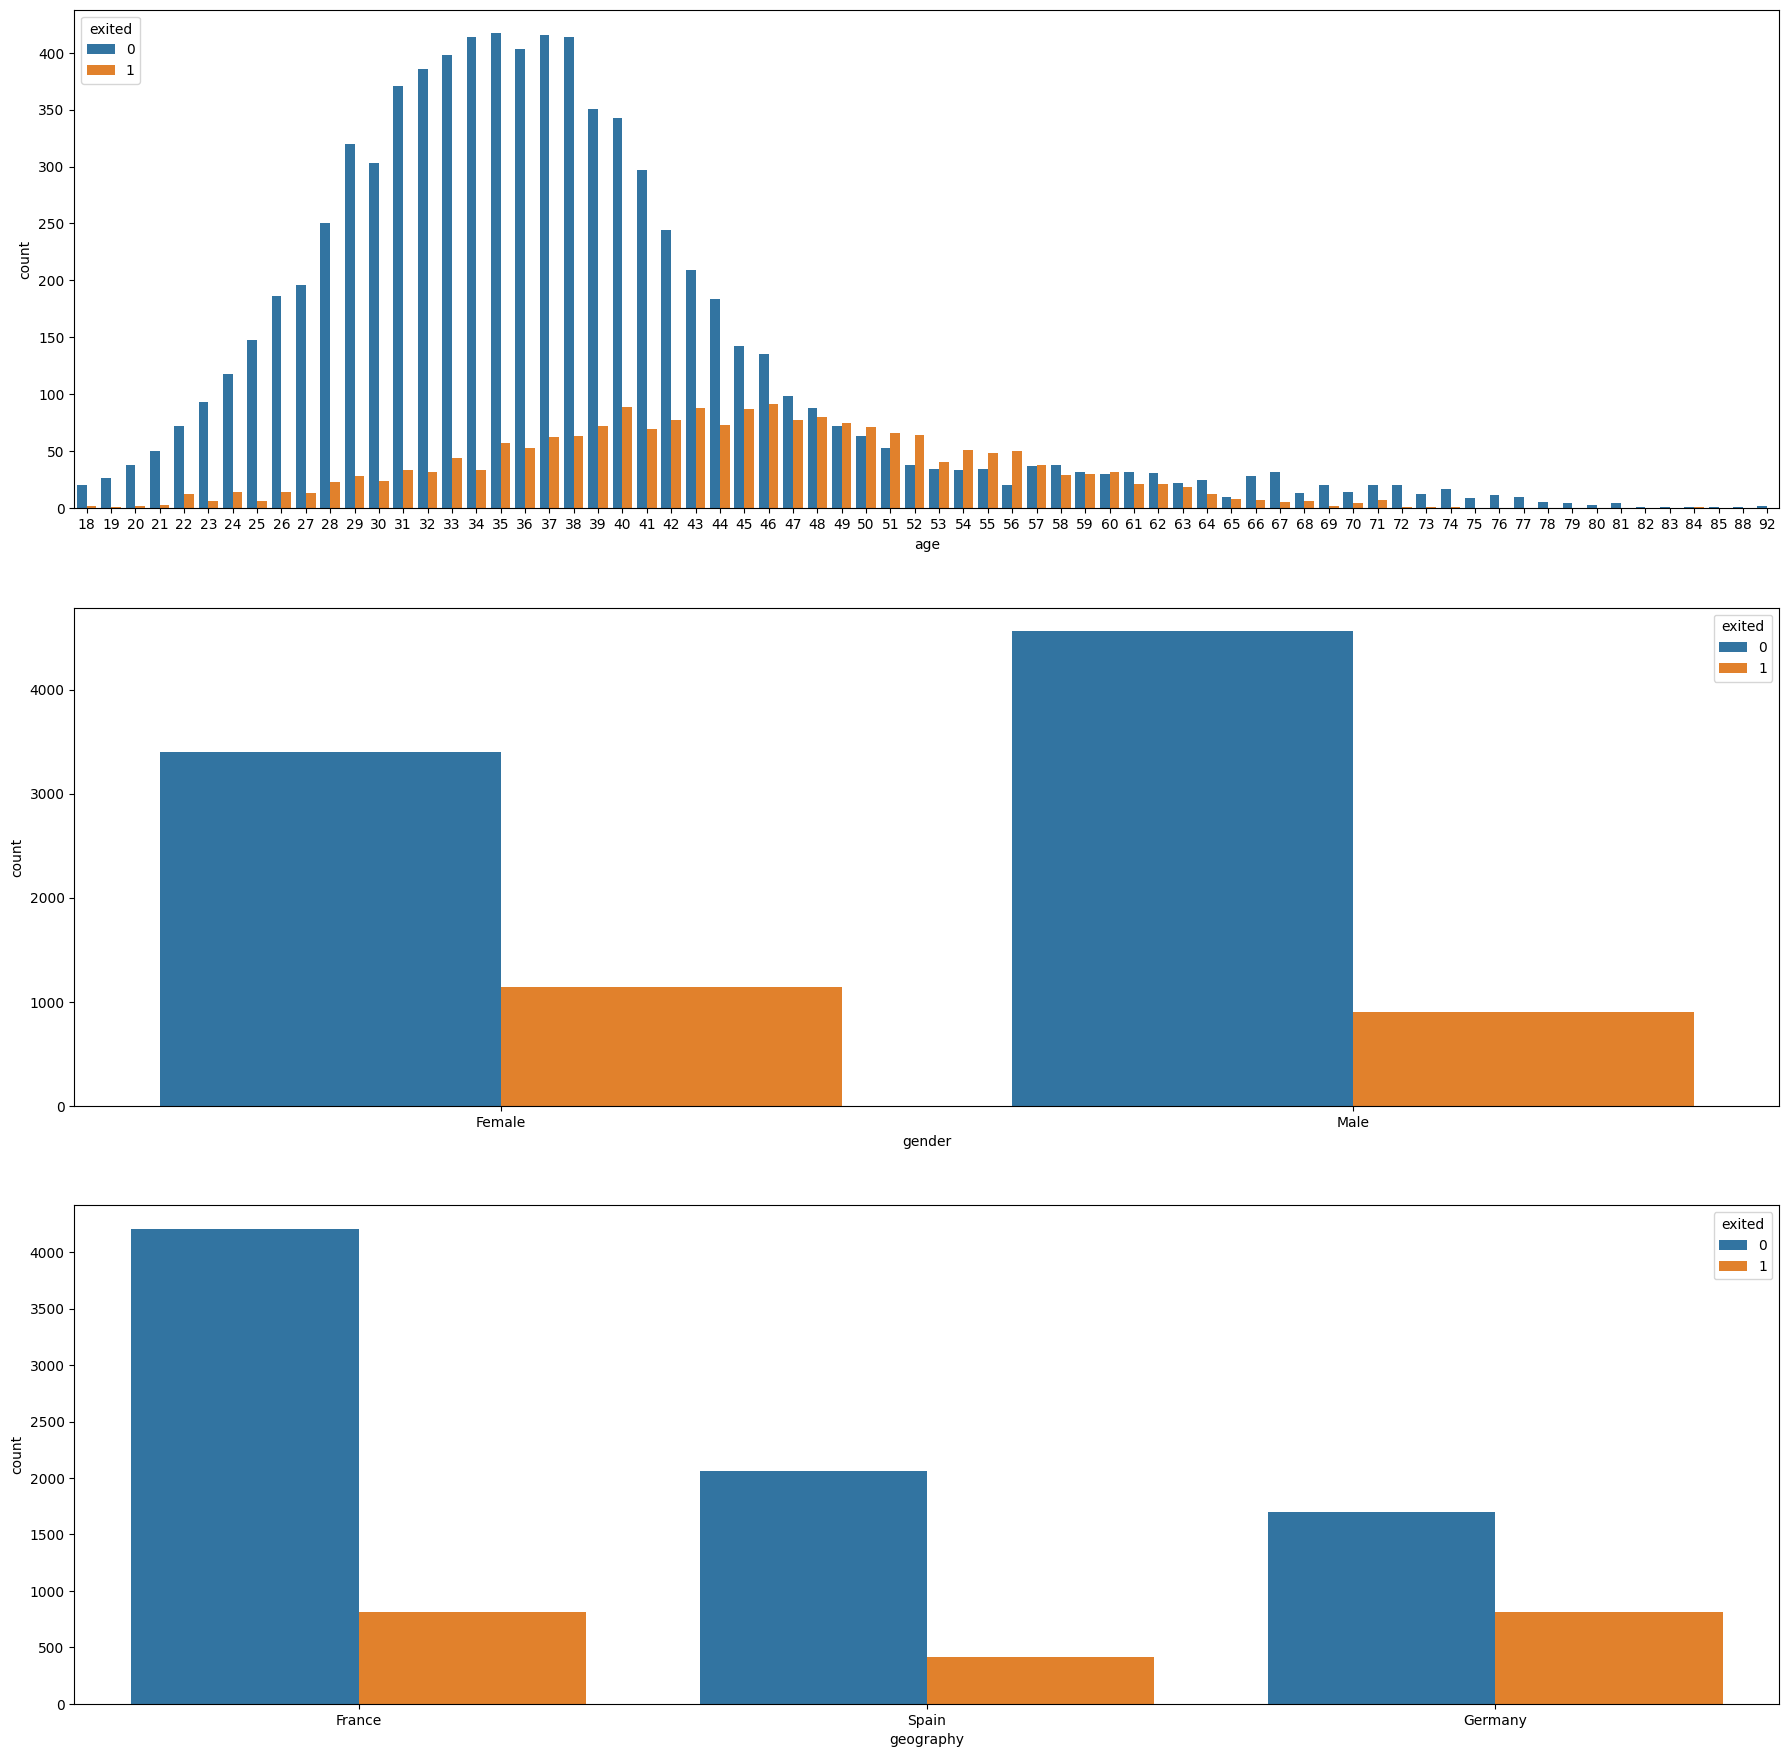

In [20]:
fig, ax = plt.subplots(3,1, figsize=(22,22))

sns.countplot(data=df, x="age", hue="exited", ax=ax[0])

sns.countplot(data=df, x="gender", hue="exited", ax=ax[1])

sns.countplot(data=df, x="geography", hue="exited", ax=ax[2]);

In [21]:
df.columns

Index(['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance',
       'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary',
       'exited'],
      dtype='object')

## Conclusion

- tenure does not appear to have an influece 
- the salary  and the credit score do not have a direct influence
- the balance varies a bit in the middle

- the more products the customer has the more likely they are to leave the bank
-
- the card and the active membership dont seem to be high correlated

- from the age of 28 until 66 there is an increase in the churn rate
- from 46 to 59 the churn rate is even higher that the the customers who stayed

- the customers that stayed with the bank are much higher in france. In Germany the Churn rate is much higher


